<a href="https://colab.research.google.com/github/Abhishek4848/IPL-Match-Analysis/blob/main/IPL_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
urlfile<-'https://raw.githubusercontent.com/Abhishek4848/IPL-Match-Analysis/main/matches.csv'
df<-read.csv(url(urlfile))

In [27]:
head(df,5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,
2,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,
3,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,
4,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,
5,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,,,


In [17]:
summary(df)

       id              season         city               date          
 Min.   :    1.0   Min.   :2008   Length:756         Length:756        
 1st Qu.:  189.8   1st Qu.:2011   Class :character   Class :character  
 Median :  378.5   Median :2013   Mode  :character   Mode  :character  
 Mean   : 1792.2   Mean   :2013                                        
 3rd Qu.:  567.2   3rd Qu.:2016                                        
 Max.   :11415.0   Max.   :2019                                        
    team1              team2           toss_winner        toss_decision     
 Length:756         Length:756         Length:756         Length:756        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                  

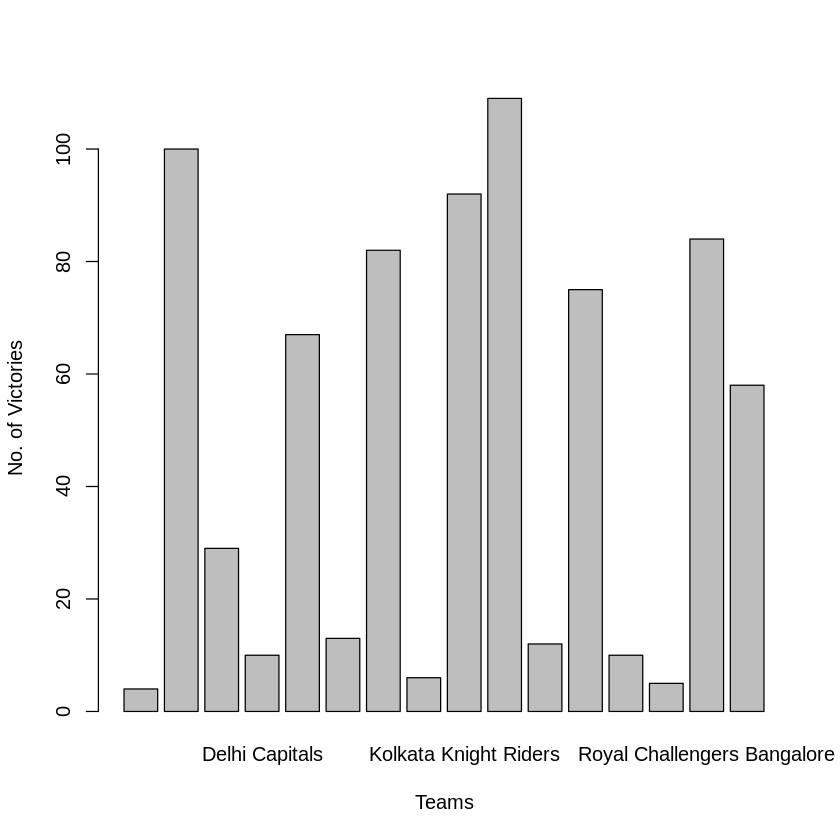

In [29]:
barplot(table(df$winner),xlab = "Teams", ylab="No. of Victories")